### Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
from io import StringIO
import ftfy

### Importação dos dados

In [2]:
url = requests.get('https://raw.githubusercontent.com/Ada-Empregabilidade/adahack-2024-dados/main/base_dados/base_de_dados.csv').content.decode('utf-8')
linhas = url.split('\n')
lista_linhas = [ftfy.fix_text(linha) for linha in linhas]
data = StringIO('\n'.join(lista_linhas))
df = pd.read_csv(data)

### Checagem dos dados importados

In [3]:
df.head(10)

,id,id.1,Nome,Genero,Idade,Raça,Endereço,Formação,Estado,Tempo de casa,Departamento,Senioridade
0,1,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34.0,pardo,"9155 Harold Oval\nSellersside, FL 21337",Ensino Médio,Santa Catarina,12.0,Compras,Analista Pleno
1,2,2,Elisângela Gabrielle de Osório,Fem,26.0,pardo,"941 Martin Manor\nLake Isaiahtown, FM 43797",Ensino Médio,Pará,6.0,Contabilidade,Analista Júnior
2,3,3,José Túlio de Cabral,Masc,35.0,pardo,"110 Davis Ridges\nMejiaville, LA 17095",Ensino Médio,Santa Catarina,5.0,Vendas,Analista Pleno
3,4,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24.0,pardo,"48010 Wilson Glen Apt. 749\nSmithborough, NV 0...",Ensino Superior,Tocantins,4.0,Administrativo,Gerente
4,5,5,Fagner Josiel dos Santos,Masc,21.0,pardo,"8666 Ramos Ports Apt. 070\nSandraport, MN 33570",Ensino Superior,Ceará,5.0,Recursos Humanos,Analista Júnior
5,6,6,Magali Luzimara da Silva,Fem,49.0,pardo,"073 Padilla Dam\nPort Joshualand, MA 65043",Ensino Superior,São Paulo,3.0,Contabilidade,Analista Pleno
6,7,7,Victor Plínio Shufrouze,Masc,29.0,pardo,"112 Rose Corners\nStanleyberg, IA 13588",Pós graduação,Ceará,9.0,Compras,Analista Sênior
7,8,8,Laércio Rossi,Masc,35.0,pardo,"508 Sean Road Apt. 754\nWest Thomaschester, AL...",Ensino Superior,Rondônia,8.0,Operações,Analista Júnior
8,9,9,Francisco Ângelo de Toledo Seixas,Masc,40.0,pardo,"9762 Goodwin Plain Apt. 560\nSchroedershire, P...",Mestrado,Amapá,1.0,Administrativo,Analista Pleno
9,10,10,Fabrício Rangel de Gonçalves dos Santos,Masc,33.0,pardo,"4979 Dana Station Apt. 126\nMichellefurt, HI 2...",Ensino Superior,Minas Gerais,3.0,Desenvolvimento de Produtos,Analista Pleno


In [4]:
df.shape

(10000, 12)

In [5]:
# Listar colunas
df.columns

Index(['id', 'id.1', 'Nome', 'Genero', 'Idade', 'Raça', 'Endereço', 'Formação',
       'Estado', 'Tempo de casa', 'Departamento', 'Senioridade'],
      dtype='object')

In [6]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns.describe()

,id,id.1,Idade,Tempo de casa
count,10000.00000,10000.00000,9944.000000,9800.000000
mean,5000.50000,5000.50000,30.827836,5.490510
std,2886.89568,2886.89568,8.738915,2.963759
min,1.00000,1.00000,5.000000,-6.000000
25%,2500.75000,2500.75000,24.000000,3.000000
50%,5000.50000,5000.50000,30.000000,5.000000
75%,7500.25000,7500.25000,37.000000,8.000000
max,10000.00000,10000.00000,74.000000,17.000000


In [10]:
non_numeric_columns = df.select_dtypes(exclude='number')
non_numeric_columns.describe()

,Nome,Genero,Raça,Endereço,Formação,Estado,Departamento,Senioridade
count,10000,10000,10000,10000,9956,10000,10000,10000
unique,9961,2,5,10000,5,27,9,7
top,Francisco da Silva,Masc,pardo,"9155 Harold Oval\nSellersside, FL 21337",Ensino Superior,São Paulo,Administrativo,Analista Júnior
freq,2,7500,4700,1,5972,1000,1112,3000


O nome Francisco da Silva parece está repetido.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   id.1           10000 non-null  int64  
 2   Nome           10000 non-null  object 
 3   Genero         10000 non-null  object 
 4   Idade          9944 non-null   float64
 5   Raça           10000 non-null  object 
 6   Endereço       10000 non-null  object 
 7   Formação       9956 non-null   object 
 8   Estado         10000 non-null  object 
 9   Tempo de casa  9800 non-null   float64
 10  Departamento   10000 non-null  object 
 11  Senioridade    10000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 937.6+ KB


Não é necessário alterar os tipos de dados

Limpando os dados

In [9]:
#remover duplicatas
df = df.drop_duplicates()

In [11]:
#Remover colunas desnecessárias
df = df.drop(columns=['id', 'id.1', 'Nome', 'Endereço'])

Essas colunas não são relevantes para o estudo.

Lidando com dados faltantes

In [14]:
#Visulalisar resultados
df.isna().sum()

Genero           0
Idade            0
Raça             0
Formação         0
Estado           0
Tempo de casa    0
Departamento     0
Senioridade      0
dtype: int64

Considerando que esses dados faltantes, como de atributos diferentes temos: 56+44+200 = 300.
Como temos um total de 10000 observações é razoalvel eliminar esses dados. Representa eliminasr 300/10000, ou seja, 3% dos dados. 

In [13]:
#Deletar dados faltantes
df = df.dropna()

In [15]:
df.iloc[0, df.columns.get_loc('Tempo de casa')] = -6

Entender essa linha.

Outliers

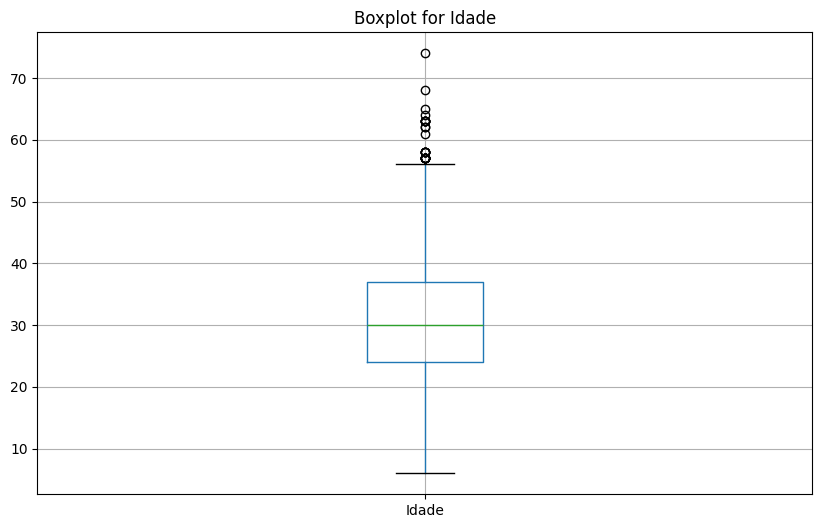

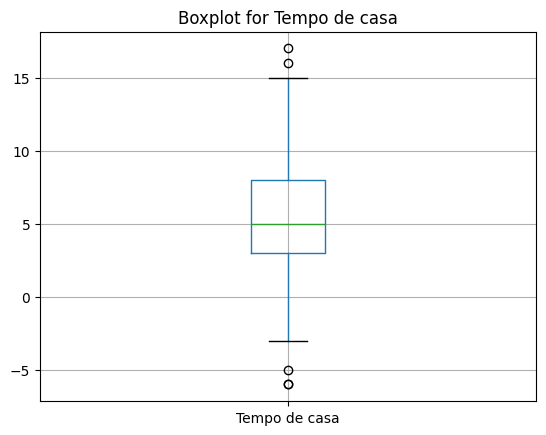

In [16]:
#Boxplot

# Assuming df is your DataFrame containing numerical columns
numerical_columns = df.select_dtypes(include='number').columns

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for column in numerical_columns:
    df.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

Não faz sentido funcionários com idade menor que 18 anos.
Não faz sentido tempo de casa negativo.

Avaliar a possibilidade de eliminar esses casos.

In [17]:
df[df['Idade'] < 18]

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
2581,Masc,12.0,preto,Ensino Superior,Ceará,2.0,Marketing,Analista Pleno
3886,Fem,6.0,preto,Ensino Superior,Alagoas,9.0,Recursos Humanos,Analista Júnior
4777,Masc,16.0,indígena,Pós graduação,Ceará,1.0,TI,Gerente
4928,Fem,13.0,preto,Ensino Superior,Amapá,7.0,Vendas,Analista Pleno
5001,Masc,17.0,preto,Ensino Superior,Amapá,2.0,Contabilidade,Analista Júnior
5845,Masc,16.0,preto,Ensino Superior,Paraná,4.0,Compras,Analista Pleno
5948,Masc,17.0,preto,Ensino Superior,Mato Grosso,10.0,TI,Analista Pleno
6599,Fem,15.0,indígena,Ensino Superior,Ceará,5.0,Recursos Humanos,Estagiário
6684,Masc,15.0,preto,Ensino Superior,Mato Grosso do Sul,9.0,Recursos Humanos,Analista Júnior
7173,Masc,10.0,preto,Pós graduação,Rio de Janeiro,5.0,Desenvolvimento de Produtos,Analista Pleno


In [19]:
df[df['Idade'] < 18].shape


(12, 8)

In [23]:
df.shape

(9689, 8)

Analisando a coluna Idade junto a coluna Formação, não faz sentido esses dados com Idade menor que 18 anos.
Como repesentam 12/9701 = 0.001, ou seja, 0,1% é razoázvel eliminar essas linhas.

In [21]:
df.drop(df[df['Idade'] < 18].index, inplace=True)

In [22]:
df[df['Tempo de casa'] <= 0]

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
0,Fem,34.0,pardo,Ensino Médio,Santa Catarina,-6.0,Compras,Analista Pleno
23,Masc,31.0,branco,Ensino Médio,Amazonas,0.0,Operações,Estagiário
29,Fem,29.0,branco,Ensino Superior,Paraná,0.0,Administrativo,Gerente
38,Fem,27.0,preto,Ensino Médio,Mato Grosso,0.0,Administrativo,Analista Júnior
41,Masc,34.0,branco,Ensino Superior,Pernambuco,0.0,TI,Analista Sênior
...,...,...,...,...,...,...,...,...
9838,Fem,34.0,preto,Ensino Superior,São Paulo,-2.0,Desenvolvimento de Produtos,Analista Pleno
9871,Masc,30.0,pardo,Ensino Superior,Acre,0.0,TI,Analista Pleno
9919,Masc,29.0,branco,Ensino Superior,Santa Catarina,0.0,Vendas,Analista Sênior
9946,Fem,41.0,pardo,Ensino Superior,Amazonas,0.0,Contabilidade,Analista Júnior


Analisando a coluna 'Tempo de casa' encontramos 498 observações com valor negativo. O que não parece fazer sentido.
Como repesentam 498/9689 = 0.05, ou seja, 5% é razoázvel eliminar essas linhas.

In [24]:
df.groupby('Genero').size()

Genero
Fem     2436
Masc    7253
dtype: int64

In [25]:
df.groupby('Raça').size()

Raça
amarelo       48
branco      4180
indígena      46
pardo       4543
preto        872
dtype: int64

In [26]:
df.groupby('Formação').size()

Formação
Doutorado           770
Ensino Médio        483
Ensino Superior    5826
Mestrado           1157
Pós graduação      1453
dtype: int64

In [27]:
df.groupby('Estado').size()

Estado
Acre                   256
Alagoas                258
Amapá                  258
Amazonas               259
Bahia                  259
Ceará                  256
Distrito Federal       255
Espírito Santo          98
Goiás                  251
Maranhão               253
Mato Grosso            255
Mato Grosso do Sul     256
Minas Gerais           774
Paraná                 681
Paraíba                250
Pará                   256
Pernambuco             255
Piauí                  256
Rio Grande do Norte    257
Rio Grande do Sul      589
Rio de Janeiro         874
Rondônia               258
Roraima                258
Santa Catarina         585
Sergipe                256
São Paulo              971
Tocantins              255
dtype: int64

In [28]:
df.groupby('Departamento').size()

Departamento
Administrativo                 1082
Compras                        1078
Contabilidade                  1067
Desenvolvimento de Produtos    1064
Marketing                      1076
Operações                      1091
Recursos Humanos               1077
TI                             1077
Vendas                         1077
dtype: int64

In [31]:
df.groupby('Senioridade').size()

Senioridade
Analista Júnior    2913
Analista Pleno     2420
Analista Sênior    1946
Diretor              86
Estagiário          866
Gerente            1458
dtype: int64

Aparemente existem dados de Gerente escrito com 'g', assim a sugestão é substituir 'gerente' por 'Gerente'

In [30]:
df['Senioridade'].replace('gerente', 'Gerente', inplace=True)